In [1]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

In [2]:
!git clone https://github.com/yhlee1627/deeplearning.git
dataframe = read_csv('/content/deeplearning/corona_daily.csv', usecols=[3], engine='python', skipfooter=3)
print(dataframe)
dataset = dataframe.values
dataset = dataset.astype('float32')

Cloning into 'deeplearning'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (5/5), done.
     Confirmed
0           24
1           24
2           27
3           27
4           28
..         ...
107      11190
108      11206
109      11225
110      11265
111      11344

[112 rows x 1 columns]


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
Dataset = scaler.fit_transform(dataset)
train_data, test_data = train_test_split(Dataset, test_size=0.2, shuffle=False)
print(len(train_data), len(test_data))


89 23


In [ ]:
def create_dataset(dataset, look_back=10):
  x_data = []
  y_data = []
  for i in range(len(dataset)-look_back-1):
    data = dataset[i:(i+look_back), 0]
    x_data.append(data)
    y_data.append(dataset[i + look_back, 0])
  return np.array(x_data), np.array(y_data)

In [ ]:
look_back = 3
x_train, y_train = create_dataset(train_data, look_back)
x_test, y_test = create_dataset(test_data, look_back)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(85, 3) (85,)
(19, 3) (19,)


In [ ]:
X_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
X_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(X_train.shape)
print(X_test.shape)

(85, 1, 3)
(19, 1, 3)


In [ ]:
model = Sequential()
model.add(SimpleRNN(3, input_shape=(1, look_back)))
model.add(Dense(1, activation="linear"))
model.compile(loss='mse', optimizer='sgd')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 3)                 21        
_________________________________________________________________
dense (Dense)                (None, 1)                 4         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
85/85 [==============================] - 0s 855us/step - loss: 2.0195e-04
Epoch 2/100
85/85 [==============================] - 0s 836us/step - loss: 2.0881e-04
Epoch 3/100
85/85 [==============================] - 0s 878us/step - loss: 2.0181e-04
Epoch 4/100
85/85 [==============================] - 0s 863us/step - loss: 2.0417e-04
Epoch 5/100
85/85 [==============================] - 0s 937us/step - loss: 2.0502e-04
Epoch 6/100
85/85 [==============================] - 0s 904us/step - loss: 2.0163e-04
Epoch 7/100
85/85 [==============================] - 0s 892us/step - loss: 2.0189e-04
Epoch 8/100
85/85 [==============================] - 0s 887us/step - loss: 2.0286e-04
Epoch 9/100
85/85 [==============================] - 0s 1ms/step - loss: 1.9715e-04
Epoch 10/100
85/85 [==============================] - 0s 914us/step - loss: 1.9664e-04
Epoch 11/100
85/85 [==============================] - 0s 887us/step - loss: 2.0039e-04
Epoch 12/100
85/85 [==============================] - 

In [ ]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)
TrainPredict = scaler.inverse_transform(trainPredict)
Y_train = scaler.inverse_transform([y_train])
TestPredict = scaler.inverse_transform(testPredict)
Y_test = scaler.inverse_transform([y_test])

In [ ]:
trainScore = math.sqrt(mean_squared_error(Y_train[0], TrainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_test[0], TestPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 140.31 RMSE
Test Score: 197.01 RMSE


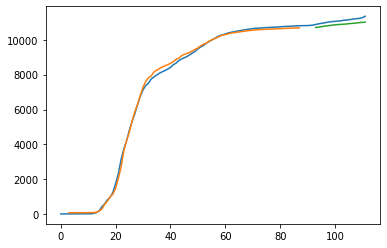

In [ ]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(TrainPredict)+look_back, :] = TrainPredict
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(TrainPredict)+(look_back+1)*2:len(dataset), :] = TestPredict
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()